In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Global settings
rate_param = 20
T = 1.0
num_trials = 10000

In [ ]:
def generate_poisson_via_inverse(mean):
    threshold = np.exp(-mean)
    product = 1.0
    count = 0
    while product > threshold:
        product *= np.random.uniform()
        count += 1
    return count - 1

In [ ]:
# Method 1: Unstratified Poisson process (inter-arrival sampling)
def run_unstratified_poisson(rate, T):
    total_jumps = generate_poisson_via_inverse(rate * T)
    if total_jumps == 0:
        return np.array([])
    interval_deltas = -np.log(np.random.rand(total_jumps)) / rate
    jump_occurrences = np.cumsum(interval_deltas)
    return jump_occurrences[jump_occurrences < T]

# Method 2: Stratified by number of jumps, uniform times
def run_stratified_poisson(rate, T):
    event_total = generate_poisson_via_inverse(rate * T)
    if event_total == 0:
        return np.array([])
    uniform_pts = np.random.rand(event_total)
    return np.sort(uniform_pts * T)

# Method 3: Fox’s stratified method
def run_poisson_fox_method(rate, T):
    event_total = generate_poisson_via_inverse(rate * T)
    if event_total == 0:
        return np.array([])
    rand_input = np.random.rand(event_total)
    fox_weights = np.empty_like(rand_input)
    pwr = event_total
    for i in range(event_total):
        fox_weights[i] = rand_input[i] ** (1 / pwr)
        pwr -= 1
    return T * np.cumprod(fox_weights)

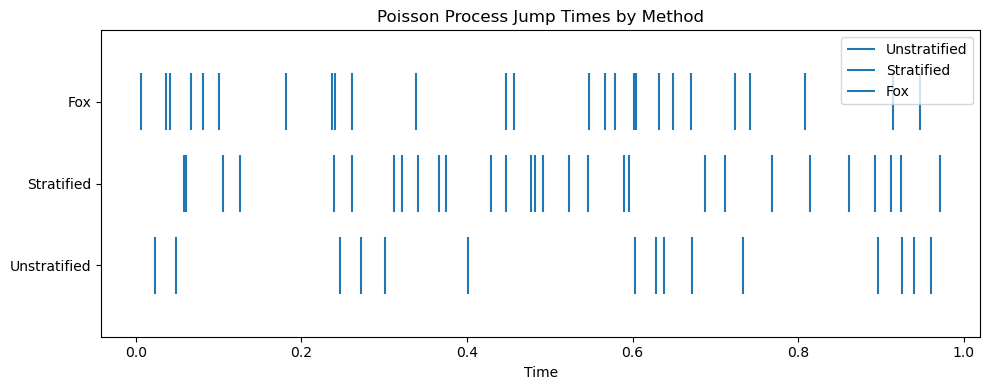

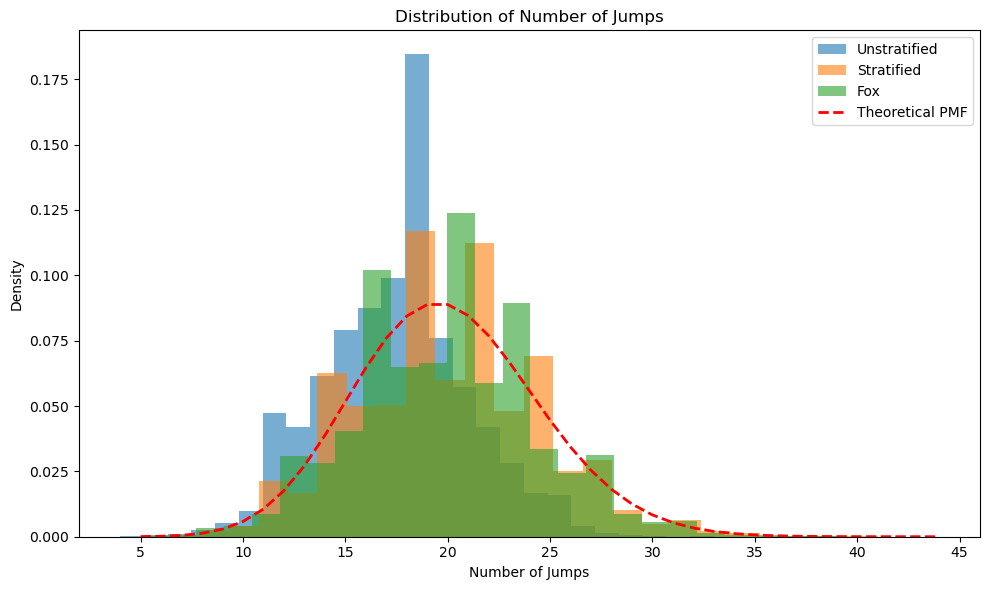

In [7]:
# Unified plot of jump times (one path per method)
plt.figure(figsize=(10, 4))
for i, (label, method) in enumerate({
    "Unstratified": run_unstratified_poisson,
    "Stratified": run_stratified_poisson,
    "Fox": run_poisson_fox_method
}.items()):
    times = method(rate_param, T)
    plt.eventplot(times, lineoffsets=i, linelengths=0.7, label=label)
plt.yticks(range(3), ["Unstratified", "Stratified", "Fox"])
plt.title("Poisson Process Jump Times by Method")
plt.xlabel("Time")
plt.legend()
plt.tight_layout()
plt.show()

# Histogram: number of jumps for each method
counts_all = {
    "Unstratified": [len(run_unstratified_poisson(rate_param, T)) for _ in range(num_trials)],
    "Stratified": [len(run_stratified_poisson(rate_param, T)) for _ in range(num_trials)],
    "Fox": [len(run_poisson_fox_method(rate_param, T)) for _ in range(num_trials)]
}

x_vals = np.arange(5, 45)
pmf_true = poisson.pmf(x_vals, mu=rate_param)

plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx, (label, values) in enumerate(counts_all.items()):
    plt.hist(values, bins=25, density=True, alpha=0.6, color=colors[idx], label=label)
plt.plot(x_vals, pmf_true, 'r--', lw=2, label="Theoretical PMF")
plt.title("Distribution of Number of Jumps")
plt.xlabel("Number of Jumps")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


### Conclusion 1:
Figure 1 compares the temporal distribution of jump times generated by three sampling methods: Unstratified, Stratified, and Fox.
The unstratified method, based on exponential inter-arrival times, shows irregular spacing with noticeable clusters and gaps. In contrast, the stratified method produces more evenly distributed jumps over the interval [0,1], while Fox’s method exhibits the smoothest and most uniform pattern due to its order-statistics-based transformation. This figure visually confirms that stratification over the number of jumps, especially using Fox’s method, enhances the uniformity of jump occurrences across time.

### Conclusion 2:
Figure 2 the histogram illustrates the empirical distributions of jump counts from the three sampling methods compared to the theoretical Poisson distribution. The unstratified method yields a distribution with higher variance and noticeable deviation from the Poisson PMF, especially in the tails. Both stratified methods, particularly Fox’s, demonstrate improved alignment with the theoretical curve, showing smoother density and tighter convergence around the mean. This supports the conclusion that stratified sampling effectively reduces sampling variability and improves the statistical efficiency of Monte Carlo simulations.